In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/Users/sumit/Downloads/diet.csv")
df

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2
...,...,...,...,...,...,...,...
71,74,Male,35,183,C,83,80.2
72,75,Male,49,177,C,84,79.9
73,76,Male,28,164,C,85,79.7
74,77,Male,40,167,C,87,77.8


In [3]:
df.columns

Index(['id', 'gender', 'age', 'height', 'diet.type', 'initial.weight',
       'final.weight'],
      dtype='object')

In [11]:
columns_to_normalize = ['age', 'height', 'initial.weight', 'final.weight']

In [7]:
scaler = StandardScaler()

In [12]:
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [16]:
df

,id,gender,age,height,diet.type,initial.weight,final.weight
0,1,Female,-1.749845,-1.038055,A,-1.803768,-1.766659
1,2,Female,0.688442,1.870818,A,-1.551307,-1.791641
2,3,Female,1.602799,-0.068430,A,-1.046385,-0.629975
3,4,Female,-0.632297,0.019717,A,-1.046385,-0.904778
4,5,Female,1.094823,-0.068430,A,-0.920154,-0.767377
...,...,...,...,...,...,...,...
71,74,Male,-0.429106,1.077489,C,1.351995,1.481009
72,75,Male,0.993228,0.548603,C,1.478226,1.443536
73,76,Male,-1.140273,-0.597316,C,1.604456,1.418554
74,77,Male,0.078870,-0.332873,C,1.856917,1.181224


In [17]:
from scipy.stats import f_oneway

In [19]:
df['weight_difference'] = df['final.weight'] - df['initial.weight']

In [22]:
if all(df.groupby('diet.type').size() > 0):
    anova_result = f_oneway(df[df['diet.type'] == 1]['weight_difference'],
                            df[df['diet.type'] == 2]['weight_difference'],
                            df[df['diet.type'] == 3]['weight_difference'])

    # Print ANOVA result
    print("ANOVA F-value:", anova_result.statistic)
    print("ANOVA p-value:", anova_result.pvalue)

    # Check if the F statistic is significant at alpha = 0.05
    alpha = 0.05
    if anova_result.pvalue < alpha:
        print("The F statistic is significant at alpha = 0.05")
    else:
        print("The F statistic is not significant at alpha = 0.05")
else:
    print("Cannot perform ANOVA: At least one group has no observations.")

ANOVA F-value: nan
ANOVA p-value: nan
The F statistic is not significant at alpha = 0.05


/var/folders/vg/v2ypf9rs6qxd8npp2lfzfdlm0000gn/T/ipykernel_30267/2156265561.py:2: DegenerateDataWarning: at least one input has length 0
  anova_result = f_oneway(df[df['diet.type'] == 1]['weight_difference'],


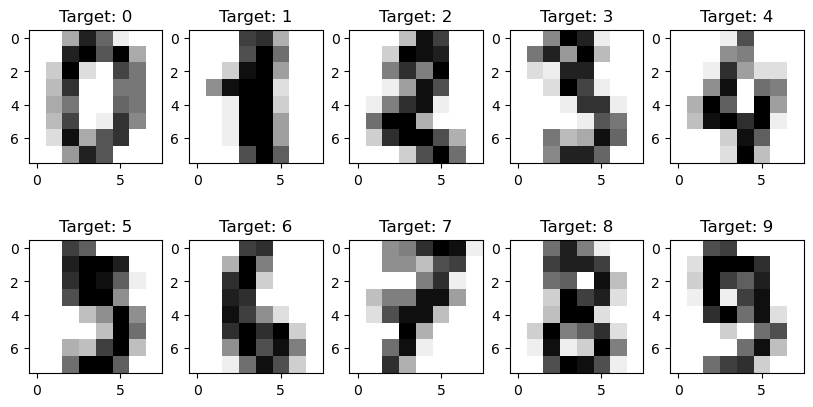

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

# Load the dataset
digits = load_digits()

# Store the data and labels
data_and_labels = digits.data
targets = digits.target

# Plot the first 10 digits
plt.figure(figsize=(10, 5))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Target: {label}')
plt.show()

# Get the data (X) and target data (Y)
X = digits.data
Y = digits.target
tar = digits.target_names


In [26]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

digits = load_digits()

X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = make_pipeline(
    StandardScaler(),
    MLPClassifier(
        hidden_layer_sizes=(3,),
        activation='relu',
        solver='adam',
        learning_rate_init=0.09,
        max_iter=10,
        batch_size=10,
        alpha=0.0001,
        early_stopping=False,
        validation_fraction=0.1,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-08,
        n_iter_no_change=10,
        random_state=42,
        tol=1e-4,
        verbose=True,
    )
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Iteration 1, loss = 1.75876333
Iteration 2, loss = 1.28552369
Iteration 3, loss = 1.19885887
Iteration 4, loss = 1.20309357
Iteration 5, loss = 1.06186609
Iteration 6, loss = 1.09959410
Iteration 7, loss = 0.90426967
Iteration 8, loss = 1.02532421
Iteration 9, loss = 1.15939605
Iteration 10, loss = 1.07245652
Accuracy: 0.6277777777777778


/Users/sumit/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
